In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import subprocess
from scipy.optimize import bisect

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [123]:
from scipy.ndimage import uniform_filter

In [73]:
ly=500
lx=2100

In [266]:
prof_m={}
for i in range(10):
    prof_m[i]=pd.read_csv('data_prof_article/i%d/f_profiles_m.dat'%i, sep=' ', names=np.arange(lx), index_col=False)


In [ ]:
    prof_m[i]=pd.read_csv('data_prof_article/i%d/f_profiles_m.dat'%i, sep=' ', names=np.arange(lx), index_col=False)


In [216]:
prof_m50=pd.read_csv('data_prof_article_rho50/i{0}/f_profiles_rho.dat', sep=' ', names=np.arange(lx), index_col=False)


In [267]:
for k in range(5):
    print(np.max(np.sum((prof_m[0].values[k*ly:(k+1)*ly,:])<0, axis=0)))


0
59
109
155
197


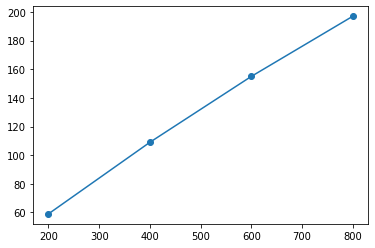

In [269]:
plt.plot([200,400,600,800], [59, 109, 155, 197], 'o-')

In [271]:
np.polyfit([200,400,600,800], [59, 109, 155, 197], deg=1)

array([ 0.23, 15.  ])

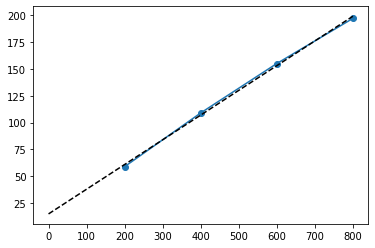

In [274]:
run={}
for i in range(10):
    run[i]=[]
    for k in range(5):
        run[i].append(np.max(np.sum((prof_m[i].values[k*ly:(k+1)*ly,:])<0, axis=0)))
        



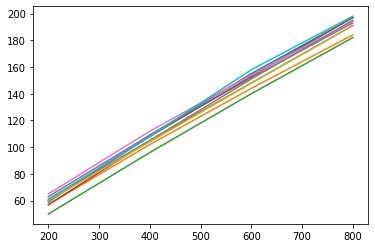

In [277]:
for i in range(10):
    plt.plot([200,400,600,800], run[i][1:])

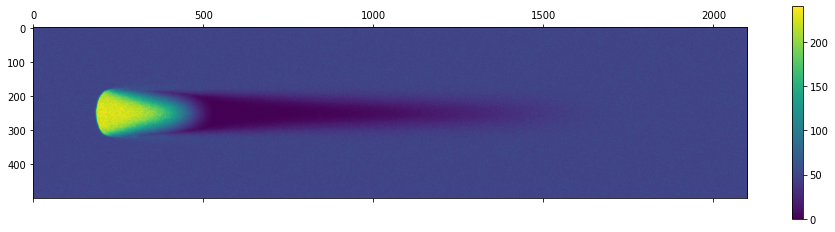

In [218]:
k=3

v0=50

Xt=(prof_m50.values[k*ly:(k+1)*ly,:])
avg_prof=uniform_filter(Xt, size=4, mode='constant')
#print(np.mean(Xt<0))
#plt.matshow(avg_prof, cmap='PiYG', vmin=-v0, vmax=v0)
plt.matshow(avg_prof)

plt.colorbar()

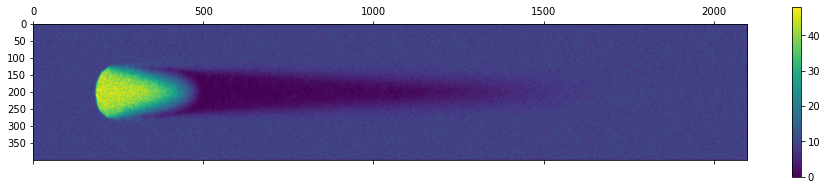

In [264]:
k=3

v0=15
i=0

Xt=(prof_m[i].values[k*ly:(k+1)*ly,:])[50:450,:]
avg_prof=uniform_filter(Xt, size=5, mode='constant')
#print(np.mean(Xt<0))
#plt.matshow(avg_prof, cmap='PiYG', vmin=-v0, vmax=v0)
plt.matshow(avg_prof)

plt.colorbar()

In [248]:
for i in range(10):
    print(np.max(np.sum((prof_m[i].values[k*ly:(k+1)*ly,:])<0, axis=0)))

155
144
140
148
152
153
154
151
148
158


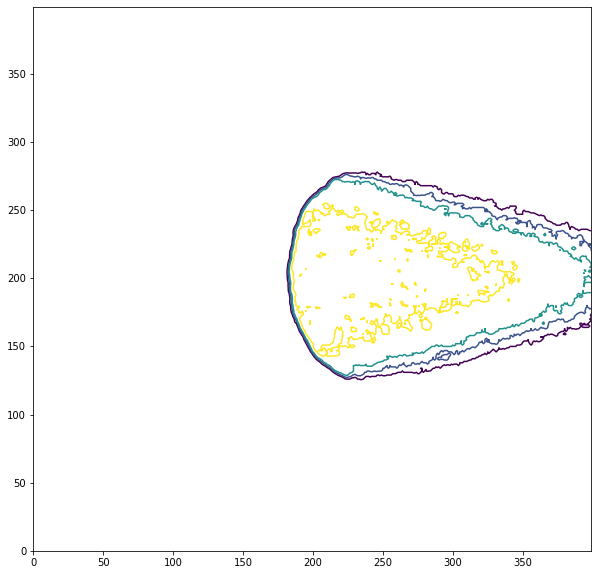

In [265]:
plt.figure(figsize=(10,10))
xmin=0
xmax=400
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 400)
X, Y = np.meshgrid(xlist, ylist)
Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[20, 25, 30, 40])

In [225]:
drop_pde=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d_MPI/f_rho_t600.dat')

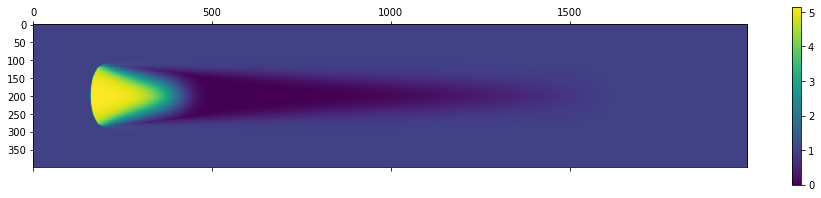

In [226]:
v0=1.5

#plt.matshow(drop_pde, cmap='PiYG', vmin=-v0, vmax=v0)

plt.matshow(drop_pde)#, cmap='PiYG', vmin=-v0, vmax=v0)

plt.colorbar()

In [234]:
for t in [200, 400, 600]:
    print(np.max(np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d_MPI/f_rho_t%d.dat'%t)[200,:]))

5.13544
5.150904
5.153498


OSError: /users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d_MPI/f_rho_t800.dat not found.

In [231]:
for k in range(10):
    print(np.max(prof_m50.values[k*ly:(k+1)*ly,:][250,:])/50)

1.46
4.84
5.04
5.14
5.58


IndexError: index 250 is out of bounds for axis 0 with size 0

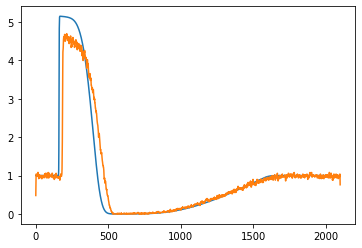

In [227]:
plt.plot(drop_pde[200,:])
plt.plot(avg_prof[250,:]/50)

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


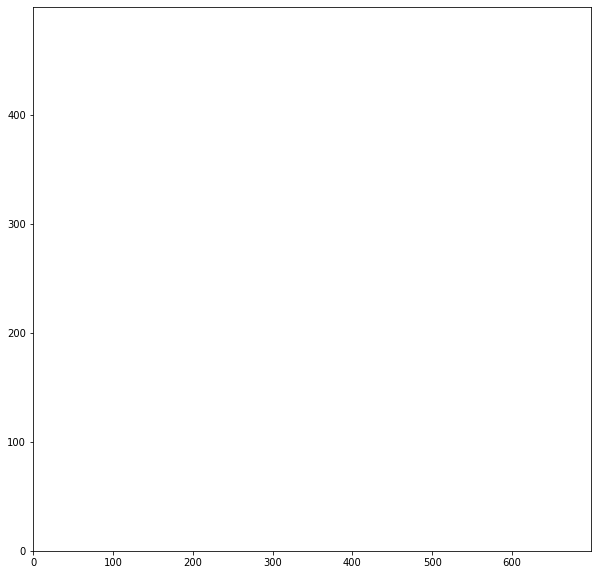

In [221]:
plt.figure(figsize=(10,10))
xmin=0
xmax=700
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 399)
X, Y = np.meshgrid(xlist, ylist)
Z1 = drop_pde[:,xmin:xmax]
cp = plt.contour(X, Y, Z1, levels=[0], colors='k')

xmin=0
xmax=500
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)
Z = np.roll(avg_prof[:,xmin:xmax], (-52,260), axis=(0,1))
cp = plt.contour(X, Y, Z, levels=[0], colors='b')

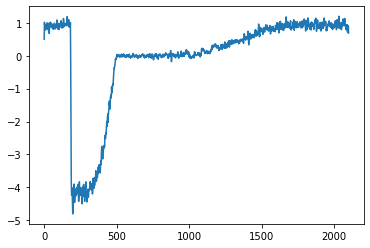

In [126]:
plt.plot(avg_prof[250,:]/10)

In [106]:
prof_m[2]

,0,1,2,3,4,5,6,7,8,9,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,15,7,3,9,9,15,9,11,17,9,...,6.0,7.0,7.0,13.0,9.0,6.0,10.0,9.0,8.0,9.0
1,8,11,8,15,11,9,8,13,11,6,...,6.0,16.0,10.0,7.0,16.0,14.0,11.0,10.0,11.0,9.0
2,8,11,13,8,11,8,14,13,12,9,...,13.0,13.0,10.0,8.0,5.0,11.0,11.0,15.0,11.0,5.0
3,7,5,13,5,7,11,11,8,13,9,...,9.0,10.0,10.0,9.0,11.0,11.0,13.0,6.0,8.0,7.0
4,9,8,8,6,12,10,9,12,7,5,...,7.0,4.0,7.0,10.0,12.0,13.0,11.0,10.0,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,14,7,13,8,12,3,11,13,8,9,...,13.0,7.0,6.0,9.0,9.0,12.0,11.0,15.0,13.0,13.0
495,5,11,10,7,11,13,16,10,12,11,...,9.0,3.0,11.0,6.0,11.0,8.0,15.0,10.0,12.0,7.0
496,5,12,15,12,15,10,11,10,14,7,...,8.0,16.0,4.0,6.0,10.0,5.0,8.0,8.0,12.0,8.0
497,7,13,13,7,12,9,12,10,12,9,...,8.0,12.0,9.0,7.0,12.0,10.0,12.0,5.0,8.0,5.0
